In [17]:
from math import pi, sqrt, tanh, exp,acos,cos,sin
import sys
import kwant
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 14.0) # set default size of plots

import cmath
# For computing eigenvalues
import scipy.sparse.linalg as sla
import numpy as np

# For plotting
from matplotlib import pyplot as plt
from datetime import datetime

In [53]:
def make_system(m1,m2,q=331,k1=0.2,k2=0.1):
    
#     print(Base_a1)
#     print(Base_a2)
#     print(a1p)
#     print(a2p)
#     print(L1)
#     print(L2)
#     print(L1_prime)
#     print(L2_prime)

#     soa1=np.array([list((0,0)+a1p),list((0,0)+a2p)])


    #lattice parameters:
    t=2.7;      #eV
    t12=-0.48;  #eV
    delta_a=0.142;    #nm
    delta_0=0.335;    #nm
    delta_12=0.0453;  #nm
    delta=delta_12;

    # Define the graphene lattice
    sin_30, cos_30 = (1 / 2, sqrt(3) / 2)
    Base_a1=(cos_30, -sin_30);   Base_a2=(cos_30,sin_30);
    A_position=(0, 0)
    B_position=(1 / sqrt(3),0)

#     (m1,m2)=(3,5);

    L1=m1*np.matrix(Base_a1)+m2*np.matrix(Base_a2);
    L1_prime=m2*np.matrix(Base_a1)+m1*np.matrix(Base_a2);

    alpha=acos((m1**2+4*m1*m2+m2**2)/(2*(m1**2+m1*m2+m2**2)));
    M_Rotation=[[cos(pi/3-alpha),-sin(pi/3-alpha)],[sin(pi/3-alpha),cos(pi/3-alpha)]];
    M_Rotation3=[[cos(pi/3),-sin(pi/3)],[sin(pi/3),cos(pi/3)]];

    a1p=np.transpose(np.matrix(M_Rotation)*np.transpose(np.matrix(Base_a1)));
    a1p=a1p.tolist();a1p=tuple(a1p[0]);
    a2p=np.transpose(np.matrix(M_Rotation)*np.transpose(np.matrix(Base_a2)));
    a2p=a2p.tolist();a2p=tuple(a2p[0]);

    L2=np.transpose(np.matrix(M_Rotation3)*np.transpose(L1));
    L2=L2.tolist();L2=tuple(L2[0]);

    L2_prime=np.transpose(np.matrix(M_Rotation3)*np.transpose(L1_prime));
    L2_prime=L2_prime.tolist();L2_prime=tuple(L2_prime[0]);

    L1=L1.tolist();L1=tuple(L1[0]);
    L1_prime=L1_prime.tolist();L1_prime=tuple(L1_prime[0]);



    A_Prime_position=np.transpose(np.matrix(M_Rotation)*np.transpose(np.matrix(A_position)));
    A_Prime_position=A_Prime_position.tolist();A_Prime_position=tuple(A_Prime_position[0]);
    B_Prime_position=np.transpose(np.matrix(M_Rotation)*np.transpose(np.matrix(B_position)));
    B_Prime_position=B_Prime_position.tolist();B_Prime_position=tuple(B_Prime_position[0]);

    graphene = kwant.lattice.general([Base_a1, Base_a2],
                                     [A_position, B_position])
    a, b = graphene.sublattices

    graphene1 = kwant.lattice.general([a1p, a2p],
                                     [A_Prime_position, B_Prime_position])
    a1, b1 = graphene1.sublattices

    supercell=kwant.lattice.general([L1, L2],[A_position])

    c=supercell.sublattices[0]



    syst = kwant.Builder()
  
    def circle(pos):
        x, y = pos
        return x ** 2 + y ** 2 < 15** 2
    
    
    def rectangle(pos):
        xR, yR = pos
        #print(pos)
        #sys.exit()
        # xR,yR=list(x*v1+y*v2)
        #return (xR <=Lx2)&(yR<=Ly2)&(xR >= Lx1)&(yR>=Ly1)
        return   (-5<=xR<=5)&(-5<=yR<=5)
        


    eta=10**-12;
    sc1L=-2+eta;sc1R=3+eta;
    sc2L=-2+eta;sc2R=3+eta;
    for n1 in range(-100,100):
       for n2 in range(-100,100):
          
           xR,yR=a(n1,n2).pos;
           ss1=(sqrt(3)*m1*xR+2*sqrt(3)*m2*xR - 3*m1*yR)/(3*(m1**2 + m1* m2 + m2**2));
           ss2=(sqrt(3)*m1*xR - sqrt(3)* m2*xR + 3* m1* yR +3* m2* yR)/(3* (m1**2 + m1*m2 + m2**2));
           if ((sc1L<=ss1<sc1R)&(sc2L<=ss2<sc2R)):
              syst[a(n1,n2)]=0
          
           xR,yR=b(n1,n2).pos
           ss1=(sqrt(3)*m1*xR+2*sqrt(3)*m2*xR - 3*m1*yR)/(3*(m1**2 + m1* m2 + m2**2));
           ss2=(sqrt(3)*m1*xR - sqrt(3)* m2*xR + 3* m1* yR +3* m2* yR)/(3* (m1**2 + m1*m2 + m2**2));
           if ((sc1L<=ss1<sc1R)&(sc2L<=ss2<sc2R)):
              syst[b(n1,n2)]=0
           
           xR,yR=a1(n1,n2).pos
           ss1=(sqrt(3)*m1*xR+2*sqrt(3)*m2*xR - 3*m1*yR)/(3*(m1**2 + m1* m2 + m2**2));
           ss2=(sqrt(3)*m1*xR - sqrt(3)* m2*xR + 3* m1* yR +3* m2* yR)/(3* (m1**2 + m1*m2 + m2**2));
           if ((sc1L<=ss1<sc1R)&(sc2L<=ss2<sc2R)):
              syst[a1(n1,n2)]=0
           
           xR,yR=b1(n1,n2).pos
           ss1=(sqrt(3)*m1*xR+2*sqrt(3)*m2*xR - 3*m1*yR)/(3*(m1**2 + m1* m2 + m2**2));
           ss2=(sqrt(3)*m1*xR - sqrt(3)* m2*xR + 3* m1* yR +3* m2* yR)/(3* (m1**2 + m1*m2 + m2**2));
           if ((sc1L<=ss1<sc1R)&(sc2L<=ss2<sc2R)):
              syst[b1(n1,n2)]=0

           xR,yR=c(n1,n2).pos
           if ((sc1L<=(sqrt(3)*m1*xR+2*sqrt(3)*m2*xR - 3*m1*yR)/(3*(m1**2 + m1* m2 + m2**2))<sc1R)&(sc2L<=(sqrt(3)*m1*xR - sqrt(3)* m2*xR + 3* m1* yR +3* m2* yR)/(3* (m1**2 + m1*m2 + m2**2))<sc2R)):
               syst[c(n1,n2)]=0




    syst0=syst.finalized()
#     print(syst0.graph.num_nodes)
   # sys.exit()


#
    syst[graphene.neighbors()] = 1
    syst[graphene1.neighbors()] = 1
    syst[supercell.neighbors()] = 1
#    syst[graphene1.neighbors()] = 1
#    syst[supercell.neighbors()] = 1

    #  syst.eradicate_dangling()
    
  
  
    hoppings = (((0, 0), a, b),((0, 1), a, b),((1, 0), a, b))
    return syst,hoppings,graphene,graphene1,supercell






In [54]:
def main(m1,m2):
    start=datetime.now()
    q=5;
    syst, hoppings,graphene,graphene1,supercell = make_system(m1,m2,q)
    a,b=graphene.sublattices
    a1,b1=graphene1.sublattices
    c=supercell.sublattices[0]
    
    # To highlight the two sublattices of graphene, we plot one with
    # a filled, and the other one with an open circle:
    def family_colors(site):
        return 'r' if site.family in graphene.sublattices else 'g'

# def hopping_colors(site1,site2):
#        return 1 if site1.tag-site2.tag==hoppings[1][0] else 0
    
    def hopping_colors(site1,site2):
       return 'r' if site1.family in (a1,b1) else 'b'
    
    def site_sizes(site):
        if site.family == a:
           size=0.05
        elif site.family == b:
           size=0.03
        elif site.family == a1:
           size=0.1
        elif site.family==c:
           size=0.15
        else:
          size=0.08
        return size
    def site_symboles(site):
       return 's' if site.family==supercell else 'o'

    def site_edgecolors(site):
       return 'r' if site.family==c else'b'



    # Plot the closed system without leads.
    kwant.plot(syst, site_color=family_colors, site_lw=0.1, colorbar=False,site_size=site_sizes,hop_lw=0.03,hop_color=hopping_colors,site_edgecolor=site_edgecolors)
    #kwant.plot(syst, site_color=family_colors, site_lw=0.1,colorbar=False)
   
    fsyst = syst.finalized()


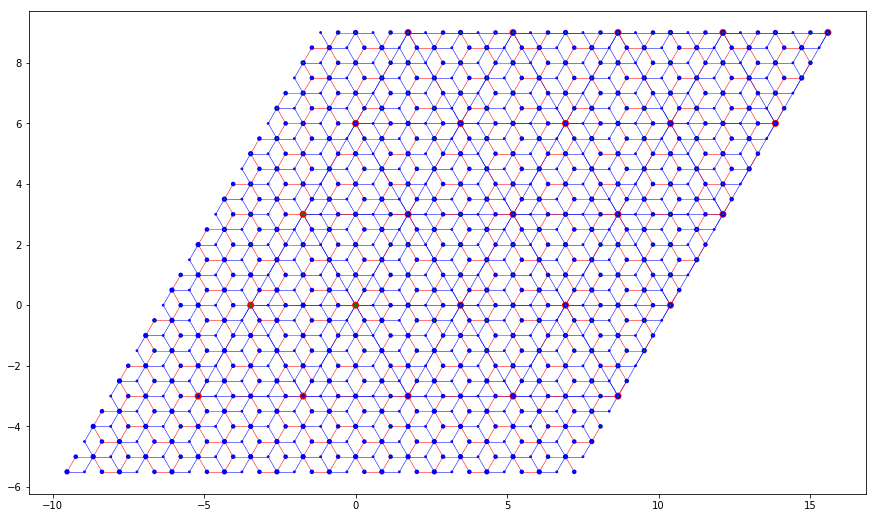

In [56]:
#Choose the geometrical parameters(m1,m2) for the Twisted Bilayer:
#(Notation according to ref. PhysRevB.88.125426(2013)) 
(m1,m2)=(2,2);
main(m1,m2)
#The lattice of the Twisted Graphene Bilayer is as follows: